***
#Data Augmentation with CNNs
***

In [ ]:
%%writefile download.sh

fileid="$1"
filename="$2"
html=`curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}"`
curl -Lb ./cookie "https://drive.google.com/uc?export=download&`echo ${html}|grep -Po '(confirm=[a-zA-Z0-9\-_]+)'`&id=${fileid}" -o ${filename}

Writing download.sh


In [ ]:
!bash download.sh 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9 cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 65.4M  100 65.4M    0     0  39.8M      0  0:00:01  0:00:01 --:--:-- 42.8M


In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')




In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
EPOCHS = 20

model = create_model()

history = model.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  
      verbose=2)

Epoch 1/20
100/100 - 25s - loss: 0.6914 - accuracy: 0.5245 - val_loss: 0.6768 - val_accuracy: 0.5710 - 25s/epoch - 251ms/step
Epoch 2/20
100/100 - 17s - loss: 0.6659 - accuracy: 0.6005 - val_loss: 0.6457 - val_accuracy: 0.5970 - 17s/epoch - 169ms/step
Epoch 3/20
100/100 - 13s - loss: 0.6183 - accuracy: 0.6545 - val_loss: 0.6971 - val_accuracy: 0.5460 - 13s/epoch - 128ms/step
Epoch 4/20
100/100 - 18s - loss: 0.5751 - accuracy: 0.6995 - val_loss: 0.5702 - val_accuracy: 0.7030 - 18s/epoch - 177ms/step
Epoch 5/20
100/100 - 12s - loss: 0.5296 - accuracy: 0.7330 - val_loss: 0.5921 - val_accuracy: 0.6930 - 12s/epoch - 118ms/step
Epoch 6/20
100/100 - 17s - loss: 0.5123 - accuracy: 0.7500 - val_loss: 0.5533 - val_accuracy: 0.7080 - 17s/epoch - 165ms/step
Epoch 7/20
100/100 - 12s - loss: 0.4761 - accuracy: 0.7750 - val_loss: 0.5940 - val_accuracy: 0.6920 - 12s/epoch - 123ms/step
Epoch 8/20
100/100 - 11s - loss: 0.4496 - accuracy: 0.7895 - val_loss: 0.5384 - val_accuracy: 0.7330 - 11s/epoch - 106

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()



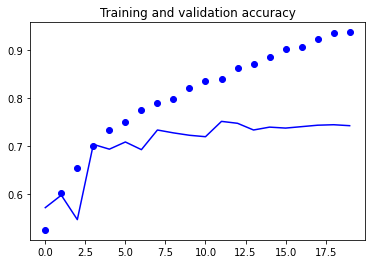

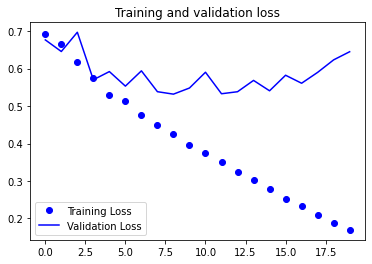

In [ ]:
plot_loss_acc(history)

In [ ]:
import pandas as pd 
df = pd.DataFrame(history.history)

df.tail(1)

,loss,accuracy,val_loss,val_accuracy
19,0.169251,0.937,0.645103,0.742


In [ ]:
model_for_aug = create_model()


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 24s - loss: 0.6930 - accuracy: 0.5205 - val_loss: 0.6829 - val_accuracy: 0.4990 - 24s/epoch - 236ms/step
Epoch 2/20
100/100 - 22s - loss: 0.6786 - accuracy: 0.5565 - val_loss: 0.6492 - val_accuracy: 0.6270 - 22s/epoch - 221ms/step
Epoch 3/20
100/100 - 23s - loss: 0.6626 - accuracy: 0.6020 - val_loss: 0.6271 - val_accuracy: 0.6660 - 23s/epoch - 226ms/step
Epoch 4/20
100/100 - 21s - loss: 0.6421 - accuracy: 0.6360 - val_loss: 0.5954 - val_accuracy: 0.6830 - 21s/epoch - 206ms/step
Epoch 5/20
100/100 - 21s - loss: 0.6204 - accuracy: 0.6495 - val_loss: 0.5761 - val_accuracy: 0.7010 - 21s/epoch - 205ms/step
Epoch 6/20
100/100 - 20s - loss: 0.6180 - accuracy: 0.6535 - val_loss: 0.6865 - val_accuracy: 0.6100 - 20s/epoch - 204ms/step
Epoch 7/20
100/100 - 22s - loss: 0.5977 - accuracy: 0.6755 - val_loss: 0.5674 - val_accuracy: 0.7050 - 22s/epoch - 215ms/step
Epoch 8/20
100/100 - 20s - loss: 0

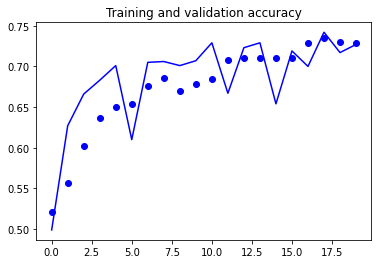

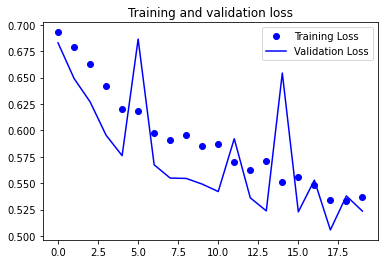

In [ ]:
plot_loss_acc(history_with_aug)

In [ ]:
import pandas as pd 
df_aug = pd.DataFrame(history_with_aug.history)

df_aug.tail(5)

,loss,accuracy,val_loss,val_accuracy
15,0.555691,0.7105,0.522794,0.719
16,0.548279,0.7285,0.552865,0.700
17,0.533767,0.7345,0.505704,0.742
18,0.533150,0.7305,0.537926,0.717
19,0.536435,0.7285,0.523513,0.727
